<a href="https://colab.research.google.com/github/Xeesto/UEP/blob/main/PUM-9-Metoda-%C5%81okcia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# 1. Wczytaj dane
df = pd.read_csv('countries of the world.csv', decimal=",")
df = df.drop(columns=['Country', 'Region'])

In [8]:
print(df.shape)

(227, 18)


In [9]:
# Usuwamy wiersze z brakami
df_clean = df.dropna()

In [10]:
# 2. Standaryzacja
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean)

In [11]:
# 3. KMeans z k=3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

In [12]:
# Dodanie kolumny z klastrem
df_clean['Cluster'] = clusters

<ipython-input-12-d011de2528ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Cluster'] = clusters


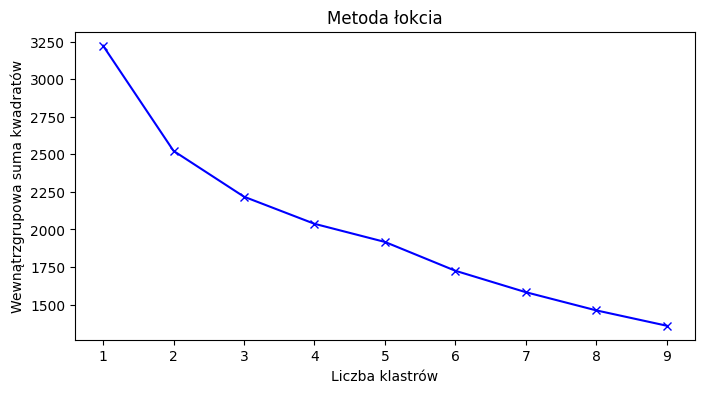

In [14]:
# 4. Optymalna liczba klastrów – metoda łokcia
distortions = []
K = range(1, 10)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km = km.fit(scaled_data)
    distortions.append(km.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Liczba klastrów')
plt.ylabel('Wewnątrzgrupowa suma kwadratów')
plt.title('Metoda łokcia')
plt.show()

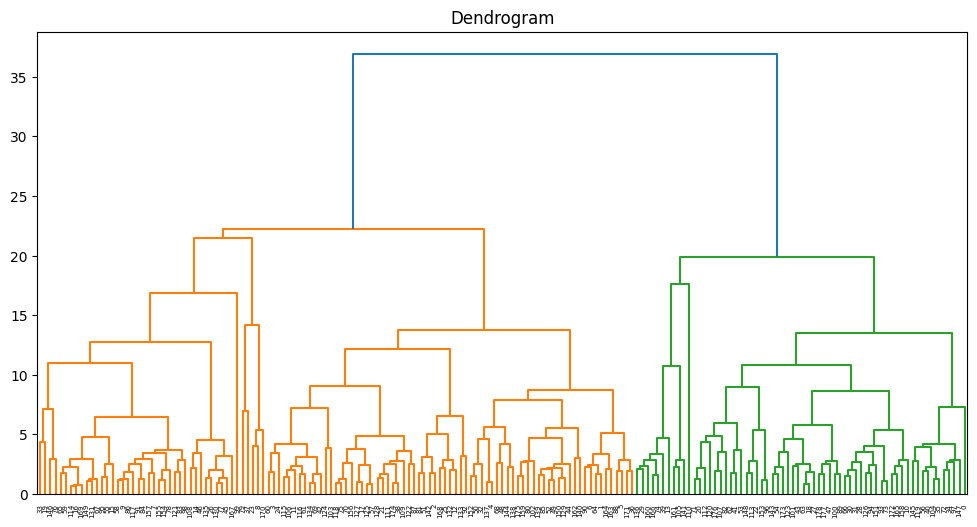

In [15]:
# 5. Dendrogram
linked = linkage(scaled_data, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram')
plt.show()

In [17]:
# 6. Podobieństwo do Polski
# Wczytanie danych ponownie, tym razem z krajami
df_full = pd.read_csv('countries of the world.csv', decimal=",")
df_full_clean = df_full.dropna()
countries = df_full_clean['Country'].values

In [18]:
# Standardyzacja danych pełnych
scaled_full_data = scaler.fit_transform(df_full_clean.drop(columns=['Country', 'Region']))

In [20]:
# Szukanie Polski i najbliższego kraju
if 'Poland' in countries:
    polska_index = list(countries).index('Poland')
    distances = cdist([scaled_full_data[polska_index]], scaled_full_data, metric='euclidean')[0]
    distances[polska_index] = np.inf  # ignorujemy samą Polskę
    closest_index = np.argmin(distances)
    print(f"Najbardziej podobnym krajem do Polski jest: {countries[closest_index]}")
else:
    print("Brak wystarczających danych")

Danych dla Polski nie znaleziono w pliku.
